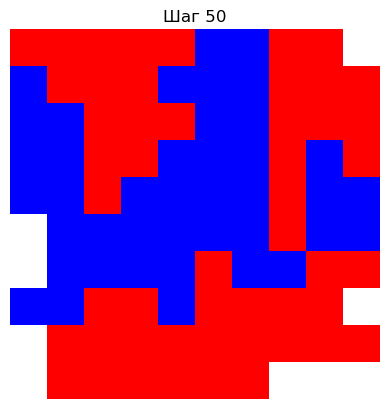

In [2]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter


class Map:
    def __init__(self, n):
        self.n = n
        self.map = self.initialize_grid()

    def initialize_grid(self):
        return np.random.choice(['B', 'R', 'E'], size=(self.n, self.n), p=[0.45, 0.45, 0.10])

    def is_happy(self, x, y):
        color = self.map[x, y]
        if color == 'E':
            return True

        neighbors = [(i, j) for i in range(max(0, x - 1), min(self.n, x + 2))
                     for j in range(max(0, y - 1), min(self.n, y + 2))
                     if (i, j) != (x, y)]

        same_color_count = sum(1 for i, j in neighbors if self.map[i, j] == color)

        return same_color_count >= 2

    def move_unhappy(self):
        unhappy_cells = [(x, y) for x in range(self.n) for y in range(self.n) if not self.is_happy(x, y)]

        if unhappy_cells:
            x, y = unhappy_cells[np.random.choice(len(unhappy_cells))]

            empty_cells = np.argwhere(self.map == 'E')
            if empty_cells.size > 0:
                new_x, new_y = empty_cells[np.random.choice(empty_cells.shape[0])]

                self.map[new_x, new_y] = self.map[x, y]
                self.map[x, y] = 'E'


class Shelling:
    def __init__(self, grid_size, steps):
        self.map = Map(grid_size)
        self.fig, self.ax = plt.subplots()
        self.ani = FuncAnimation(self.fig, self.update, frames=steps)
        self.colors = ['white', 'blue', 'red']

    def update(self, frame):
        previous_grid = self.map.map.copy()
        self.map.move_unhappy()

        self.ax.clear()

        cmap = mcolors.ListedColormap(self.colors)
        grid_numeric = np.where(self.map.map == 'B', 1, np.where(self.map.map == 'R', 2, 0))
        self.ax.imshow(grid_numeric, cmap=cmap)

        self.ax.set_title(f"Шаг {frame + 1}")
        self.ax.axis('off')

        if np.array_equal(previous_grid, self.map.map):
            self.ani.pause()

    def run(self):
        self.ani.save('sheltering_model.gif', writer=PillowWriter(fps=30))
        plt.show()


grid_size = 10
steps = grid_size * 5

sim = Shelling(grid_size, steps)
sim.run()
